# 데이터 로드

In [1]:
# 필요 프레임워크 및 라이브러리 준비
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import re
import urllib.request

# 데이터 로드

In [2]:
# 네이버 쇼핑 리뷰 데이터 다운 로드
urllib.request.urlretrieve("https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/naver_shopping.txt", filename="ratings_total.txt")

('ratings_total.txt', <http.client.HTTPMessage at 0x7f2b25670d90>)

In [3]:
# 판다스로 각 파일데이터를  train/test 변수에 바인딩
total_data = pd.read_table('ratings_total.txt')

In [4]:
# 훈련 데이터 내용 확인
total_data[:] # 상위 5개 출력

,5,배공빠르고 굿
0,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
1,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
2,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
3,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ
4,2,비추합니다 계란 뒤집을 때 완전 불편해요 ㅠㅠ 코팅도 묻어나고 보기엔 예쁘고 실용적...
...,...,...
199994,2,장마라그런가!!! 달지않아요
199995,5,다이슨 케이스 구매했어요 다이슨 슈퍼소닉 드라이기 케이스 구매했어요가격 괜찮고 배송...
199996,5,로드샾에서 사는것보다 세배 저렴하네요 ㅜㅜ 자주이용할께요
199997,5,넘이쁘고 쎄련되보이네요~


In [5]:
# 열 제목 추가
total_data = pd.read_table('ratings_total.txt', names=['ratings', 'document'],)
print('전체 리뷰 개수 :',len(total_data)) # 전체 리뷰 개수 출력

전체 리뷰 개수 : 200000


In [6]:
# 훈련 데이터 내용 확인
total_data[:] # 상위 5개 출력

,ratings,document
0,5,배공빠르고 굿
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ
...,...,...
199995,2,장마라그런가!!! 달지않아요
199996,5,다이슨 케이스 구매했어요 다이슨 슈퍼소닉 드라이기 케이스 구매했어요가격 괜찮고 배송...
199997,5,로드샾에서 사는것보다 세배 저렴하네요 ㅜㅜ 자주이용할께요
199998,5,넘이쁘고 쎄련되보이네요~


# 평점 기준으로 라벨링하기

In [7]:
# 평점으로 라벨링하기(4,5점=1, 1,2점=0)
total_data['label'] = np.select([total_data.ratings > 3], [1], default=0)
total_data[:5]

,ratings,document,label
0,5,배공빠르고 굿,1
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고,0
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...,1
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...,0
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ,1


In [8]:
 # shuffling
total_data = total_data.sample(frac=1).reset_index(drop=True) 
total_data[:5]

,ratings,document,label
0,2,입고다니기 좀그래요 실내에서만 입으세요,0
1,4,"포장박스가 살짝오픈되어 있어서 조금 그랬는데.. 상품은 이상없었고, 예상했던맛이며 ...",1
2,2,"직원분 실수로 잘못 배달되어져서, 간장소스거 와버렸죠,그래도 와사비는 맛좋으네요",0
3,2,색은 괜찮은데 얇아서 금방 구멍나요...,0
4,2,재구매 가격이 시중에사는것보다 비싸서 부담스럽네요,0


# 데이터 클렌징

In [9]:
# 중복 데이터 체크
total_data['document'].nunique(), total_data['label'].nunique()

(199908, 2)

In [10]:
# 중복 데이터 제거
total_data.drop_duplicates(subset=['document'], inplace=True) # document 열에서 중복인 내용이 있다면 중복 제거

In [11]:
# 중복 샘플 제거 확인
print('총 샘플의 수 :',len(total_data))

총 샘플의 수 : 199908


In [12]:
# NULL값 유무 체크
print(total_data.isnull().values.any())

False


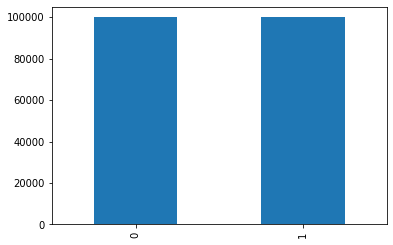

In [13]:
# 훈련 데이터에서의 레이블 값의 분포 확인
total_data['label'].value_counts().plot(kind = 'bar')

In [14]:
# 균일해보이지만 정확하게 몇개인지 확인해보자
print(total_data.groupby('label').size().reset_index(name = 'count'))

   label  count
0      0  99957
1      1  99951


# 데이터 정규화

In [15]:
# 훈련데이터에 한글과 공백을 제외하고 모두 제거해보자
total_data['document'] = total_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
total_data[:5]

,ratings,document,label
0,2,입고다니기 좀그래요 실내에서만 입으세요,0
1,4,포장박스가 살짝오픈되어 있어서 조금 그랬는데 상품은 이상없었고 예상했던맛이며 공복에...,1
2,2,직원분 실수로 잘못 배달되어져서 간장소스거 와버렸죠그래도 와사비는 맛좋으네요,0
3,2,색은 괜찮은데 얇아서 금방 구멍나요,0
4,2,재구매 가격이 시중에사는것보다 비싸서 부담스럽네요,0


In [16]:
# 공백만 남은 데이터를 넓값으로 바꾸고 개수를 체크하자
total_data['document'] = total_data['document'].str.replace('^ +', "") # white space 데이터를 empty value로 변경
total_data['document'].replace('', np.nan, inplace=True)
print(total_data.isnull().sum())

ratings     0
document    0
label       0
dtype: int64


# 정제&정규화한 데이터 파일로 저장

In [18]:
total_data.to_csv('naver_shopping_review_total_data.txt', index=False, sep='\t')